#### Twitter Sentiment Analysis Project

#### Business Understanding 
I have been tasked with undertaking a sentiment analysis project for a company. This project aimed to analyze the emotion expressed in customer-generated text data, which in this case are tweets from the social media platform, Twitter, regarding specific brands and products. These tweets were rated by human raters who expressed their opinions on the tweets and identified them as either positive, negative, or other emotions. The objective of this project was to build a model that is able to rate the feeling of a tweet based on its content just like the human raters.

#### Data Understanding
The dataset provided had three real-time columns:
- Tweet_text: These were texts that in form of tweets shared the emotions and opinions of customers on the company's products via Twitter.

- Emotion_in_tweet_directed_at: These were the products that customers tweeted expressing how they felt about them and after reviewing the dataset there were many different emotions directed at these products expressed by customers.

- is_there_an_emotion_directed_at_a_brand_or_product: These are the emotions that human raters gave as their opinion regarding tweets that customers posted directed towards the company's products.

#### Main Objective
- The main aim of this project was to build a model that determines whether a sentiment of a tweet about the company's products is positive or negative or any other emotion based on the content of the tweet. 

#### Specific Objectives
- Binary Classifier: By first quantifying tweets that expressed negative and positive only, building a model that classifies only two emotions/sentiments first limiting analysis to positive and negative tweets only.

- Multi-class Classfier: Building a model that includes any other tweets apart from positive and negative tweets such as neutral tweets hence building a model that classifies more than two emotions/sentiments.

#### 1. Importing the necessary libraries

In [10]:
# These are the libraries I used throught the project
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('wordnet')
import numpy as np
import pandas as pd
import re
import seaborn as sns
from keras import models
from keras import layers,optimizers,regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Activation,Dropout,Dense,Embedding,LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 2. Reading the data

In [11]:
df = pd.read_csv('tweet_products_company.csv',encoding='latin-1')
df.head(15)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [12]:
df.info() # Displaying dataset description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


#### Observation
The dataset provided has three columns and a total of 9093 entries, clearly has missing values in some of the columns but 9093 is the aggregate number of entries.

Before keeping the necessary columns, I visualized the products and the number of tweets about the them.

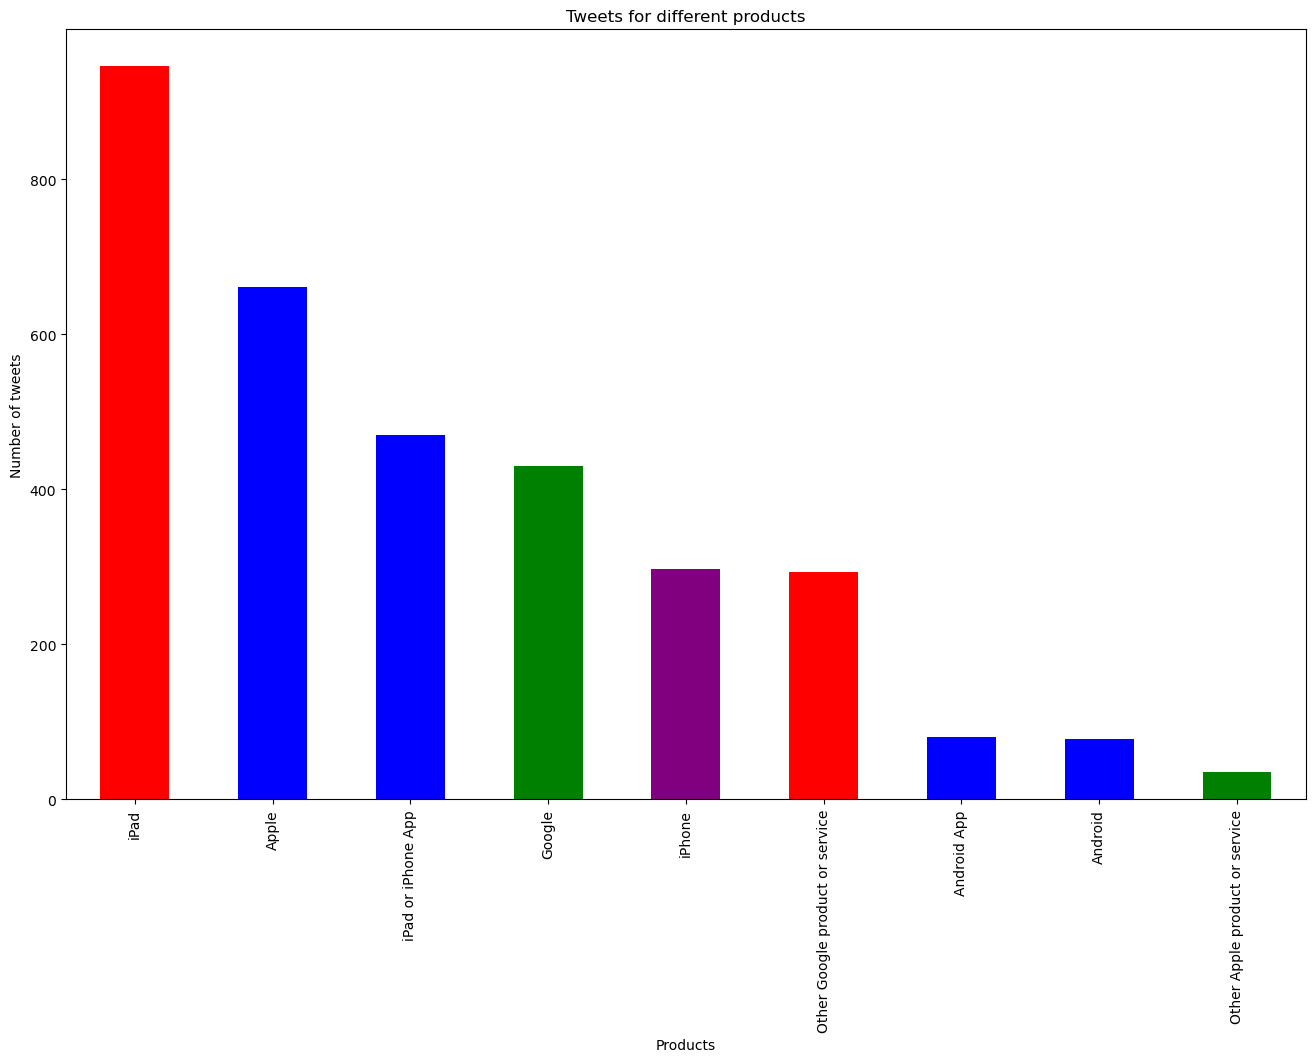

In [13]:
# Creating a bar plot that displays each product and the tweets directed at it
colors = ['red','blue','blue','green','purple']
df['emotion_in_tweet_is_directed_at'].value_counts().sort_values(ascending=False)\
    .plot(kind='bar',title='Tweets for different products',figsize=(16, 10),color=colors)
plt.xlabel('Products')
plt.ylabel('Number of tweets')
plt.show()

I also visualized the emotions directed towards different company products, which very clearly informed which of the company products had better 'rep' according to the sentiments about them expressed through tweets.

c:\Users\HP\anaconda3_2.0\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3_2.0\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3_2.0\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


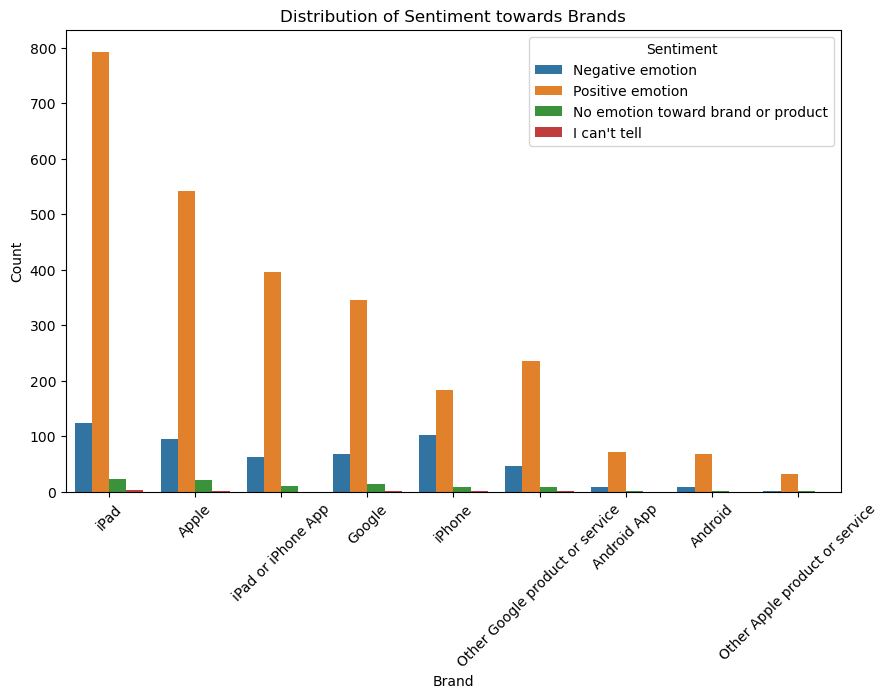

In [14]:
# Create a countplot to show the distribution of sentiment towards brands
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', data=df, order=df['emotion_in_tweet_is_directed_at'].value_counts().index)
plt.title('Distribution of Sentiment towards Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')

plt.show()

#### Observation
As shown the company had many products of which customers posted various tweets about them, following the visualization above it seems that all of the company's products had higher positive sentiments than negative, neutral or unknown sentiments directed towards them.

-  For the purpose of the project is sentiment analysis, I chose the columns the necessary columns from the dataset as the focus is   tweets and the emotions/sentiments expressed in them.

In [15]:
# Keeping the necessary columns
df = df[['tweet_text','is_there_an_emotion_directed_at_a_brand_or_product']]
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


#### 3. Data Preprocessing

These columns have really long names so I renamed the column names to simplify the column names.

In [16]:
df.rename(columns = {'tweet_text' : 'text'},inplace=True)
df.rename(columns = {'is_there_an_emotion_directed_at_a_brand_or_product' : 'sentiment'},inplace=True)

There we have it the column names are better than before so let us process this dataset for sentiment analysis.

So now that we have the columns necessary in the dataset we can check the overall information of the dataset again.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       9092 non-null   object
 1   sentiment  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


The dataset has columns with different range of row values but since the missing values are equal to 1. I chose to impute the missing value using a constant value.

In [18]:
df['text'] = df['text'].fillna(value='Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       9093 non-null   object
 1   sentiment  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


Perfect! Now our columns have the same number of rows in data.

#### 4. Exploratory Data Analysis

Lets check out the data before modelling.

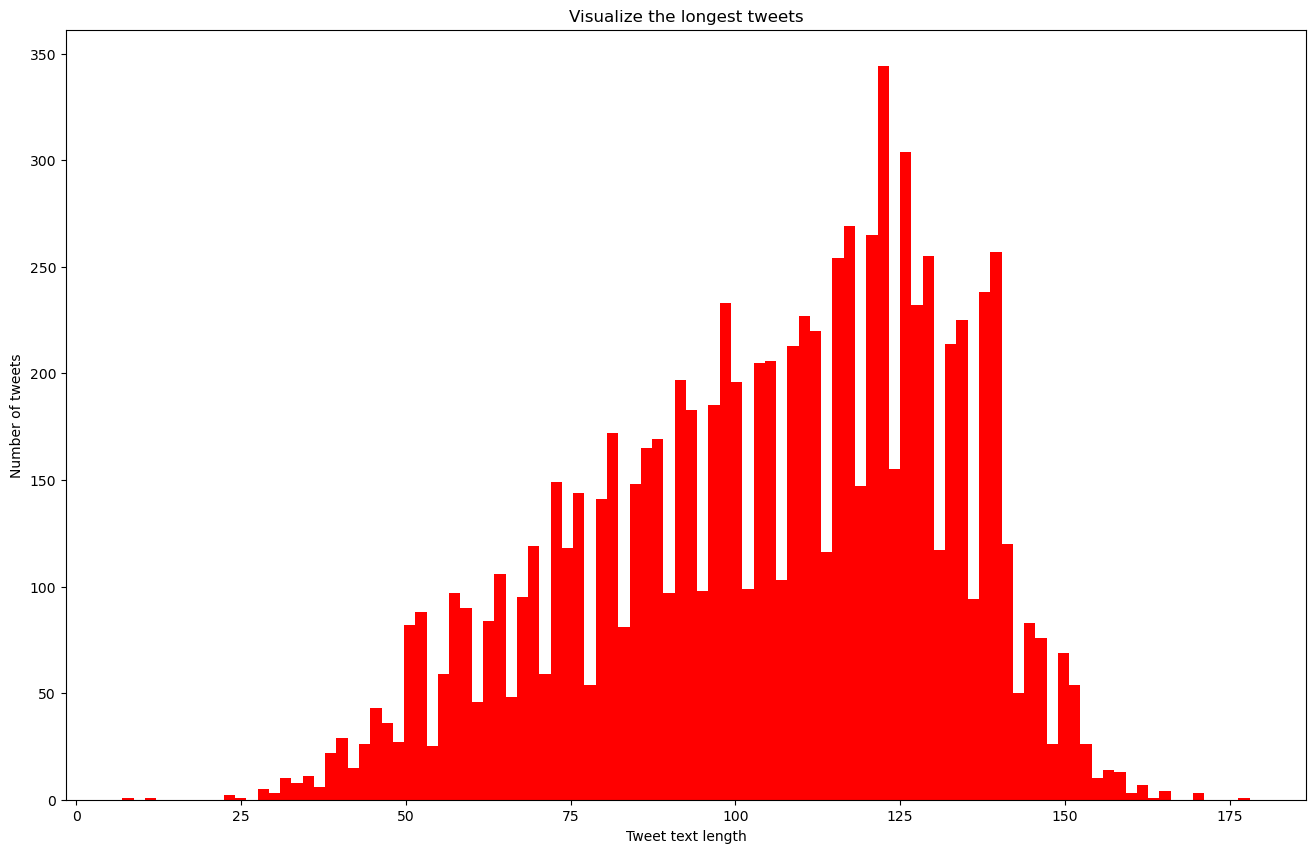

In [19]:
# visualize the text length in text data
df['text']=df['text'].astype(str)
df['tweet_text_length'] = df['text'].apply(len)
df['tweet_text_length'].plot(bins=100, kind='hist',title='Visualize the longest tweets',
                               figsize=(16, 10),color=colors)
plt.xlabel('Tweet text length')
plt.ylabel('Number of tweets')
plt.show()

We clearly have very lengthy tweets, tweeters had alot to say in the tweets they posted, but that not really an issue only a valid observation.

Let us continue exploring this dataset specifically the types of emotions in the 'sentiment' column as to identify what we are really dealing with.

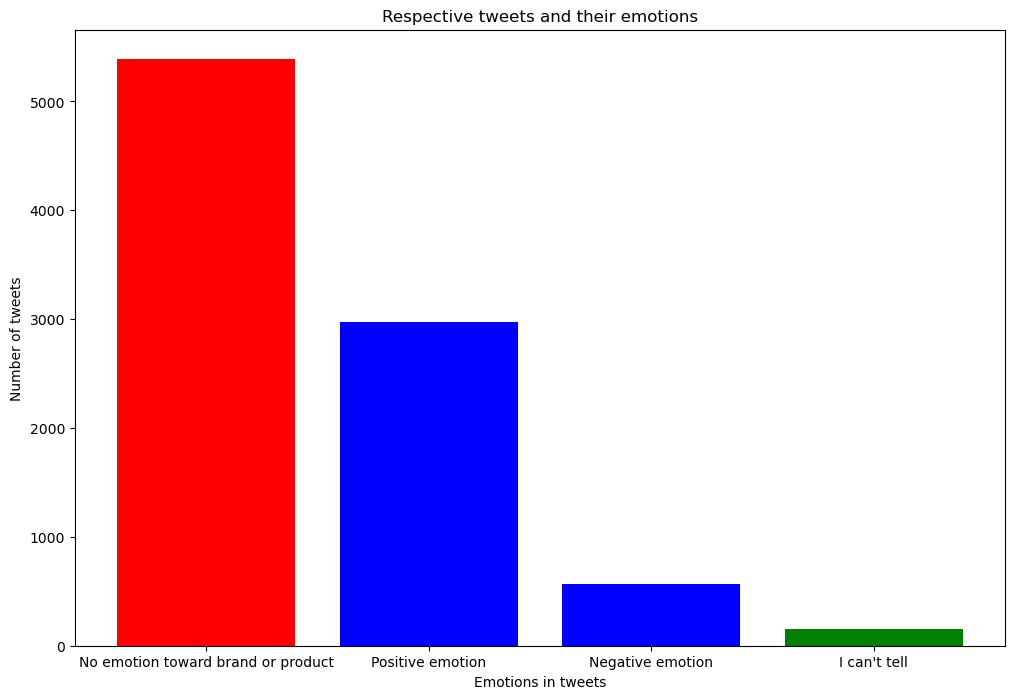

In [20]:
# Identifies the distribution between labels in the target variable 'sentiment'
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
frequencies = sentiment_counts.values
plt.figure(figsize=(12,8))
plt.bar(labels,frequencies,color=colors)
plt.title('Respective tweets and their emotions')
plt.xlabel('Emotions in tweets')
plt.ylabel('Number of tweets')
plt.show()

In [21]:
df['sentiment'].value_counts()# Checking values in emotions

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

As we can see the dataset we have has four different types of emotions which are all valid. Let us start by building a binary classifier; this mean limiting the sentiment analysis to tweets that were identified as potraying negative or positive emotion.

(A multi-classifier will be built later)

In [22]:
data = df.copy()
data = data[data.sentiment != 'No emotion toward brand or product']
data = data[data.sentiment != "I can't tell"]
print(data[data['sentiment'] == 'Positive emotion'].size)
print(data[data['sentiment'] == 'Negative emotion'].size)

8934
1710


So what I have done in the cell above is made a copy of the dataset. The next step was to filter out the tweets that did not have positive or negative emotion as for a binary classifier I was only interested with positive and negative tweets.

There are many different approaches that are viable options for sentiment analysis and with experimentation of the options, the aim is to obtain the best possible solution. Let us begin with the automatic approaches that is machine learning models.

#### 5. Getting the data ready for Deep NLP

Deep NLP involves the application the Recurrent Neural Network model which is a sequence model that is able to focus on order of words hence capturing information quite effectively.

Then I split the dataset into X and Y .

In [23]:
X = data['text']
y = data['sentiment']

Lets now deal with our target variable and encode labels before splitting it into the train,test and validation sets.

In [24]:
# Defining the emojis that need to be removed
emojis = {
    ":)": "smiley",
    ":(": "sad"
    # Add more emojis and their corresponding replacements if needed
}
# Preprocesses the text before tokenization
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        stopwordlist = stopwords.words('english')
        for word in tweet.split():
            # Checking if the word is a stopword.
            if word not in stopwordlist:
                if len(word)>1:
                # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

# Applying the preprocess function
tweets = X
preprocessed_tweets = preprocess(tweets)
print(preprocessed_tweets)

# I one-hot encoded the target variable y converting y values to numerical features.
encoder = OneHotEncoder(sparse=False)
sentiment = np.array(y)
encoded = encoder.fit_transform(sentiment.reshape(-1,1))
print(encoded)


['USER 3g iphone hr tweeting rise austin dead need upgrade plugin station sxsw ', 'USER know USER awesome ipad iphone app likely appreciate design also giving free t sxsw ', 'USER wait ipad also sale sxsw ', 'USER hope year festival crashy year iphone app sxsw ', 'USER great stuff fri sxsw marissa mayer google tim reilly tech book conference amp matt mullenweg wordpress ', 'sxsw starting ctia around corner googleio hop skip jump good time android fan ', 'beautifully smart simple idea rt USER USER wrote hollergram ipad app sxsw URL ', 'counting day sxsw plus strong canadian dollar mean stock apple gear ', 'excited meet USER sxsw show sprint galaxy still running android fail ', 'find amp start impromptu party sxsw USER URL wait til android app come ', 'foursquare ups game time sxsw URL still prefer USER far best looking android app date ', 'gotta love sxsw google calendar featuring top party show case check rt USER via USER gt URL ', 'great sxsw ipad app USER URL ', 'haha awesomely rad i

c:\Users\HP\anaconda3_2.0\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Great! now we have text clean of special characters and punctuation, text in lower case and text that does not have stop words.

We also now have our target variable in labelled classes.

Train-Test split

The data is split into training and test sets and in this case I assigned 1500 observations to the test and seed to 42.

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets,encoded,test_size=1500,random_state=42)

I created a Validation set as well as the model created is highly likely to be subject to hyperparameter tuning, and so the validation set will be used until a final model is decided upon. The final model will then be tested on the unseen test data that will provide an unbiased performance of the final model.

In [26]:
# Splits data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train,y_train,test_size=1000,random_state=42)


I used Tokenizer from keras preprocessing:  

Tokenizer is a class provided by Keras, specifically designed 
for text tokenization and preprocessing in deep learning models.

This tokenizer also converts tokens to sequences.

In [27]:
# Let us create a function to do this as we will do this a couple more times
def preprocess_text_data(X_train, X_test, X_val, num_words=2000):
    # Create and fit the tokenizer
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(X_train + X_val + X_test)

    # Convert text sequences to token sequences
    X_train_token = tokenizer.texts_to_sequences(X_train)
    X_test_token = tokenizer.texts_to_sequences(X_test)
    X_val_token = tokenizer.texts_to_sequences(X_val)

    # Find the maximum sequence length
    max_sequence_length = max(len(seq) for seq in X_train_token + X_val_token + X_test_token)

    # Pad sequences
    train_padded_sequences = pad_sequences(X_train_token, maxlen=max_sequence_length)
    test_padded_sequences = pad_sequences(X_test_token, maxlen=max_sequence_length)
    val_padded_sequences = pad_sequences(X_val_token, maxlen=max_sequence_length)

    # Reshape sequences
    train_padded_sequences = train_padded_sequences.reshape(train_padded_sequences.shape[0], train_padded_sequences.shape[1], 1)
    test_padded_sequences = test_padded_sequences.reshape(test_padded_sequences.shape[0], test_padded_sequences.shape[1], 1)
    val_padded_sequences = val_padded_sequences.reshape(val_padded_sequences.shape[0], val_padded_sequences.shape[1], 1)

    return train_padded_sequences, test_padded_sequences, val_padded_sequences

# Calling the function on the split data
train_padded_sequences, test_padded_sequences, val_padded_sequences = preprocess_text_data(X_train_final, X_test, X_val,num_words=2000)

The sequences above are now fully converted into integers but to be able to fit an RNN model.


The next step is to compose a LSTM network which is part of RNN architecure. 

But first let us use the technique that is word embeddings to convert these sequences of integers into vector representations.

Word Embeddings are dense vector representations of words in a high-dimensional space. The purpose of word embeddings is to capture the meaning and interpretation of words; semantic relationships that is.

Word embeddings have benefits such as representing text/words as dense vectors of fixed dimensions allowing for much more efficient storage and computation, among other things such as capturing semantic relationships.

Word embeddings prove to be very useful to an LSTM network as the model is able to effectively process sequential data,generalize well and leverage pre-trained linguistic knowledge.

In [28]:
# In this case I used an embedding layer that is a layer that
# learns word embeddings for our dataset right inside a neural
# network


#### 6. Modelling -> Building A Baseline Binary Classifier

I defined the network architecture and added number of layers as well as activation functions.

I also added regularization layers (Dropout) to the network to prevent overfitting the model.

In [29]:
#Input shape is the vocabulary size
embedding_size = 128
model = Sequential()
model.add(Embedding(2000, embedding_size))
model.add(LSTM(64, input_shape=(22,1)))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid'))# Use 2 units in output layer for binary classification. 


Once you have designed the model, you still have to compile it, and provide important parameters such as the loss function.

Since I started with binary classification I used 'adam' as the optimizer. 

Adam is used for its robust performance on a wide range of tasks and is often a good choice for binary classification. 

In [30]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

I used the metric `accuracy` for all my models  as according to our `business understanding` I needed to build a model that will accurately rate the sentiment from a tweet based on its content.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         256000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 305538 (1.17 MB)
Trainable params: 305538 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finally, I fit the model by passing in data, the labels and setting hyperparameters such as the batch size, number of epochs to train for and training and validation data.

In [32]:
# Fitting the model on training data and testing on validation data
baseline_model_val = model.fit(train_padded_sequences,y_train_final,validation_data=
          (val_padded_sequences,y_val),epochs=150,batch_size=32)

Epoch 1/150
33/33 [==============================] - 6s 40ms/step - loss: 0.4903 - accuracy: 0.8445 - val_loss: 0.4458 - val_accuracy: 0.8290
Epoch 2/150
33/33 [==============================] - 1s 17ms/step - loss: 0.3732 - accuracy: 0.8464 - val_loss: 0.4052 - val_accuracy: 0.8290
Epoch 3/150
33/33 [==============================] - 1s 20ms/step - loss: 0.2404 - accuracy: 0.8960 - val_loss: 0.4493 - val_accuracy: 0.8520
Epoch 4/150
33/33 [==============================] - 1s 18ms/step - loss: 0.1313 - accuracy: 0.9571 - val_loss: 0.6292 - val_accuracy: 0.8570
Epoch 5/150
33/33 [==============================] - 1s 27ms/step - loss: 0.0699 - accuracy: 0.9809 - val_loss: 0.4965 - val_accuracy: 0.8390
Epoch 6/150
33/33 [==============================] - 1s 26ms/step - loss: 0.0413 - accuracy: 0.9924 - val_loss: 0.7605 - val_accuracy: 0.8450
Epoch 7/150
33/33 [==============================] - 1s 18ms/step - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.6210 - val_accuracy: 0.8340
Epoch 

The model above is the first binary classifier built to and four entries were being monitored during training and validation one metric per entry.

In [33]:
baseline_model_dict = baseline_model_val.history
print(baseline_model_dict.keys())
# As we can see loss and accuracy were the metrics being monitored during training and validation.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [34]:
# Lets evaluate the model on the training data
results_train = model.evaluate(train_padded_sequences,y_train_final)
print (f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

33/33 [==============================] - 0s 5ms/step - loss: 7.1297e-04 - accuracy: 1.0000
Training Loss: 0.000713 
Training Accuracy: 1.0


In [35]:
# Lets evaluate the model on the test data
results_test = model.evaluate(test_padded_sequences,y_test)
print (f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

47/47 [==============================] - 0s 4ms/step - loss: 0.9477 - accuracy: 0.8347
Test Loss: 0.948 
Test Accuracy: 0.835


In [36]:
# Let us use this function to visualize loss and accuracy for training and validation loss and accuracy
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

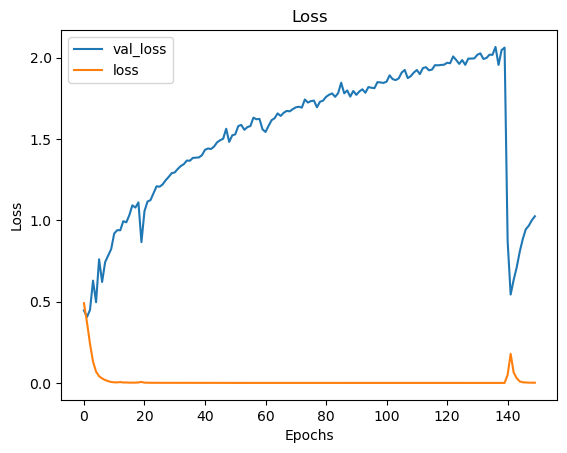

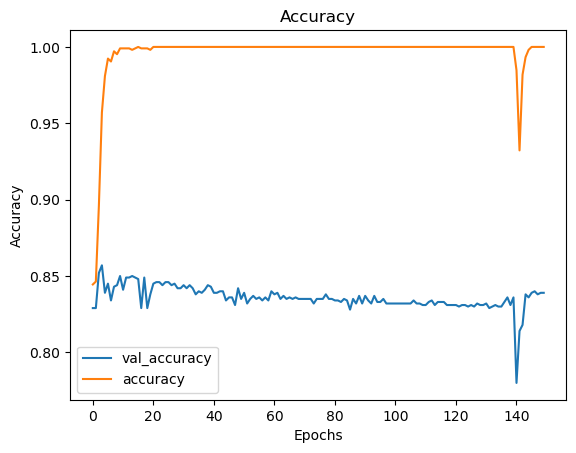

In [37]:
# Displaying loss and accuracy for the baseline model
visualize_training_results(baseline_model_val)

#### Observation
- There seems to be overfitting of the neural networks with training accuracy at 100% and test accuracy at 82%, something that we need to avoid. 
- We cannot know the precise number of epochs that we need to trian the model as it is a time consuming process but what we can do is apply early stopping a regularization technique that stops the training process before the model starts to overfit the training data.
- This prevents the model from learning the noise present in the training data.

In [38]:
# Defining the callbacks for the Early stopping regularization technique
early_stopping = [EarlyStopping(patience=10,monitor='val_loss'),
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

model_2_val = model.fit(train_padded_sequences,y_train_final,validation_data=
          (val_padded_sequences,y_val),epochs=150,batch_size=32,callbacks=early_stopping)

Epoch 1/150
33/33 [==============================] - ETA: 0s - loss: 8.1360e-04 - accuracy: 1.0000

c:\Users\HP\anaconda3_2.0\envs\learn-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 1s 32ms/step - loss: 8.1360e-04 - accuracy: 1.0000 - val_loss: 1.0477 - val_accuracy: 0.8390
Epoch 2/150
33/33 [==============================] - 1s 19ms/step - loss: 7.0226e-04 - accuracy: 1.0000 - val_loss: 1.0687 - val_accuracy: 0.8390
Epoch 3/150
33/33 [==============================] - 1s 21ms/step - loss: 6.5120e-04 - accuracy: 1.0000 - val_loss: 1.0862 - val_accuracy: 0.8380
Epoch 4/150
33/33 [==============================] - 1s 19ms/step - loss: 5.1803e-04 - accuracy: 1.0000 - val_loss: 1.1016 - val_accuracy: 0.8390
Epoch 5/150
33/33 [==============================] - 1s 18ms/step - loss: 4.6179e-04 - accuracy: 1.0000 - val_loss: 1.1170 - val_accuracy: 0.8400
Epoch 6/150
33/33 [==============================] - 1s 17ms/step - loss: 4.5765e-04 - accuracy: 1.0000 - val_loss: 1.1332 - val_accuracy: 0.8400
Epoch 7/150
33/33 [==============================] - 1s 25ms/step - loss: 3.7702e-04 - accuracy: 1.0000 - val_loss: 1.1461 - val_accurac

In [39]:
# Let us load the best saved model from the training above
from keras.models import load_model
saved_model = load_model('best_model.h5')

# Lets evaluate the best model on the training data
result_train = saved_model.evaluate(train_padded_sequences,y_train_final)
print (f'Training Loss: {result_train[0]:.3} \nTraining Accuracy: {result_train[1]:.3}')

# Lets evaluate the best model on the test data
results_test = saved_model.evaluate(test_padded_sequences,y_test)
print (f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

33/33 [==============================] - 1s 5ms/step - loss: 6.0029e-04 - accuracy: 1.0000
Training Loss: 0.0006 
Training Accuracy: 1.0
47/47 [==============================] - 1s 11ms/step - loss: 0.9685 - accuracy: 0.8340
Test Loss: 0.968 
Test Accuracy: 0.834


#### Observation

According to our results the model that Early model regularization technique has considered its best model results is the results at 10 epochs where the testing accuracy is around 83%.

This is great as it goes to show the model stopped training before it could overfit data and those were our results.

We could continue applying hyperparameter tuning to the the baseline model but I will choose to proceed to building a multi-class classifier.

### 7. Modelling -> Building A Multi-class Classifier

Building a multi-class classifier means having a target variable with more than two classes.

In the original dataset we had four classes in the target variable sentiment and now we want to build a classifier that will allow more than two classes.

As recalled the target had the below classes with the respective corresponding number of column values.

In [40]:
sentiment_counts = np.array(df['sentiment'].value_counts())
# With the main focus now being on all tweets we have not just positive and negative tweets.
# Let us look at their percentages
total_documents = np.sum(sentiment_counts)
# Calculate percentages 
sentiment_percentages = {sentiment: (count/total_documents) * 100
                         for sentiment, count in zip(df['sentiment'].unique(), sentiment_counts)}
for sentiment,percentage in sentiment_percentages.items():
    print(f'Percentage of {sentiment}: {percentage:.2f}%')



Percentage of Negative emotion: 59.27%
Percentage of Positive emotion: 32.75%
Percentage of No emotion toward brand or product: 6.27%
Percentage of I can't tell: 1.72%


Splitting the data into X and y

In [41]:
X = df['text']
y = df['sentiment']

I encoded the target variables to turn them into numerical features that can be fed to a machine learning model.

In [42]:
# Assume you have your target labels stored in a variable called `y`
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the target labels
encoded_y = label_encoder.fit_transform(y)
np.unique(encoded_y)

array([0, 1, 2, 3])

Great, so the target labels have been converted to numerical features.

In [43]:
# Let us convert predictor variable X from unclean text to clean text
tweets_1 = X
# Using the function from before to clean the text X variable
preprocessed_tweets_1 = preprocess(tweets_1)
print(preprocessed_tweets_1)


['USER 3g iphone hr tweeting rise austin dead need upgrade plugin station sxsw ', 'USER know USER awesome ipad iphone app likely appreciate design also giving free t sxsw ', 'USER wait ipad also sale sxsw ', 'USER hope year festival crashy year iphone app sxsw ', 'USER great stuff fri sxsw marissa mayer google tim reilly tech book conference amp matt mullenweg wordpress ', 'USER new ipad apps speechtherapy communication showcased sxsw conference URL iear edchat asd ', 'unknown ', 'sxsw starting ctia around corner googleio hop skip jump good time android fan ', 'beautifully smart simple idea rt USER USER wrote hollergram ipad app sxsw URL ', 'counting day sxsw plus strong canadian dollar mean stock apple gear ', 'excited meet USER sxsw show sprint galaxy still running android fail ', 'find amp start impromptu party sxsw USER URL wait til android app come ', 'foursquare ups game time sxsw URL still prefer USER far best looking android app date ', 'gotta love sxsw google calendar featurin

In [44]:
# Split data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(preprocessed_tweets_1,encoded_y,test_size=1500,random_state=42)

# Split data into training and validation sets
X_train_last, X_val_1, y_train_last, y_val_1 = train_test_split(X_train_1,y_train_1,test_size=1500,random_state=42)

In [45]:
# Calling the tokenization function on the split data
train_padded_sequences_1, test_padded_sequences_1, val_padded_sequences_1 = preprocess_text_data(X_train_last, X_test_1, X_val_1,num_words=2000)

In [46]:
num_classes = 4 # because target variable y has four classes
input_shape = (22, 1)  # Assuming input sequences of length 100 with 1 feature

# Create the LSTM model
model_1 = models.Sequential()
embedding_size = 56
model_1.add(Embedding(2000, embedding_size))
model_1.add(layers.LSTM(64, input_shape=input_shape))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(num_classes, activation='softmax'))# The outpt layer needs to have units similar to number of classes present

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#sparse_categorical_crossentropy is the loss function used because the labels we have are converted to integers

# Print a summary of the model architecture
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 56)          112000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                30976     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 147396 (575.77 KB)
Trainable params: 147396 (575.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Fitting the model on training data and validation data
multi_model_val = model_1.fit(train_padded_sequences_1,y_train_last,validation_data=
          (val_padded_sequences_1,y_val_1),epochs=120,batch_size=32)


Epoch 1/120
191/191 [==============================] - 5s 13ms/step - loss: 0.9269 - accuracy: 0.5902 - val_loss: 0.8737 - val_accuracy: 0.6020
Epoch 2/120
191/191 [==============================] - 2s 12ms/step - loss: 0.7710 - accuracy: 0.6599 - val_loss: 0.7996 - val_accuracy: 0.6660
Epoch 3/120
191/191 [==============================] - 3s 14ms/step - loss: 0.6440 - accuracy: 0.7266 - val_loss: 0.8200 - val_accuracy: 0.6720
Epoch 4/120
191/191 [==============================] - 3s 15ms/step - loss: 0.5642 - accuracy: 0.7633 - val_loss: 0.8530 - val_accuracy: 0.6573
Epoch 5/120
191/191 [==============================] - 2s 12ms/step - loss: 0.5106 - accuracy: 0.7947 - val_loss: 0.9075 - val_accuracy: 0.6533
Epoch 6/120
191/191 [==============================] - 3s 15ms/step - loss: 0.4648 - accuracy: 0.8108 - val_loss: 0.9612 - val_accuracy: 0.6593
Epoch 7/120
191/191 [==============================] - 3s 16ms/step - loss: 0.4187 - accuracy: 0.8282 - val_loss: 1.0555 - val_accuracy:

In [48]:
# Let us evaluate the model on the training data
loss, accuracy = model_1.evaluate(train_padded_sequences_1,y_train_last)
print (f'Training loss and Training accuracy {loss,accuracy}')
#Lets evaluate the model on test data
loss, accuracy = model_1.evaluate(test_padded_sequences_1,y_test_1)
print (f'Test loss and Test accuracy {loss,accuracy}')

191/191 [==============================] - 1s 5ms/step - loss: 0.0188 - accuracy: 0.9911
Training loss and Training accuracy (0.018845343962311745, 0.9911373853683472)
47/47 [==============================] - 0s 4ms/step - loss: 5.4808 - accuracy: 0.6087
Test loss and Test accuracy (5.4808149337768555, 0.6086666584014893)


Loss and accuracy are the metrics that are monitored during training of nueral networks and so for each entry (training and validation data), each has one metric that is monitored.

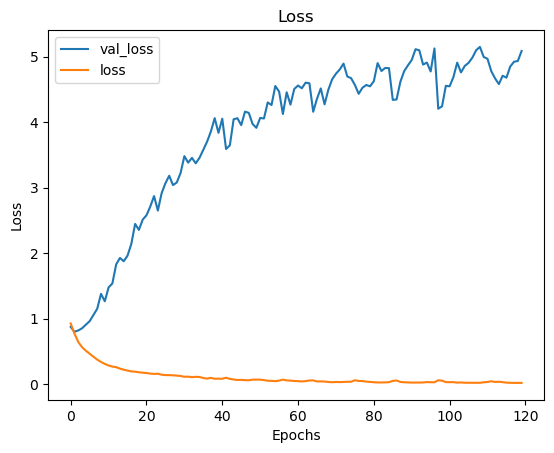

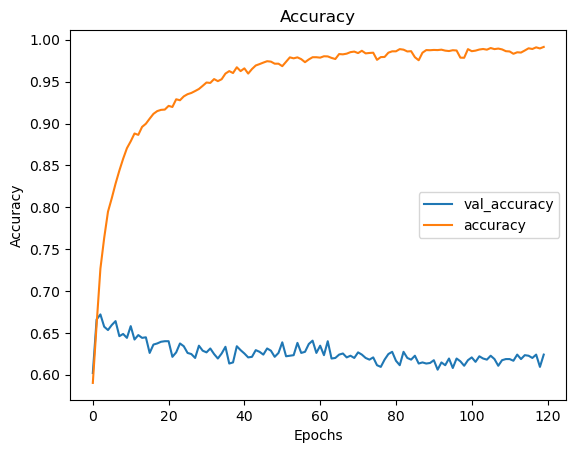

In [49]:
# Visualizing multi-class classifier model results
visualize_training_results(multi_model_val)

#### Observation
There is clear overfitting present in this model; the training accuracy of this model is at 99% while the testing accuracy is at    60.79%. Let us tune this network with regularization techniques to deal with this overfitting.

#### Tuned LSTM Network.

In [50]:
# Create a second LSTM network
model_3 = models.Sequential()
embedding_size = 128
model_3.add(Embedding(2000, embedding_size))
model_3.add(layers.LSTM(56, input_shape=input_shape))# In this case we will apply dropout regularization
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(num_classes, activation='softmax'))# The outpt layer needs to have units similar to number of classes present

# Compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#sparse_categorical_crossentropy is the loss function used because the labels we have are converted to integers

# Print a summary of the model architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         256000    
                                                                 
 lstm_2 (LSTM)               (None, 56)                41440     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                3648      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 301348 (1.15 MB)
Trainable params: 30134

In [51]:
# Our target variable has a class imbalance that needs to be addressed.
class_weights = dict(enumerate(1/np.bincount(y_train_last)))
# When class weights are calculated, the model assigns higher penalties to the minority classes during training, 
# helping address the issue of class imbalance
sample_weights = np.array([class_weights[class_label] for class_label in y_train_last])
# Fitting the model on training data and validation data
second_multi_model_val = model_3.fit(train_padded_sequences_1,y_train_last,validation_data=
          (val_padded_sequences_1,y_val_1),epochs=100,batch_size=32,sample_weight=sample_weights)

Epoch 1/100


191/191 [==============================] - 6s 18ms/step - loss: 9.1070e-04 - accuracy: 0.3652 - val_loss: 1.3295 - val_accuracy: 0.5933
Epoch 2/100
191/191 [==============================] - 3s 15ms/step - loss: 8.7134e-04 - accuracy: 0.4106 - val_loss: 1.1975 - val_accuracy: 0.5167
Epoch 3/100
191/191 [==============================] - 3s 16ms/step - loss: 7.9600e-04 - accuracy: 0.4208 - val_loss: 1.2048 - val_accuracy: 0.4367
Epoch 4/100
191/191 [==============================] - 3s 16ms/step - loss: 6.7134e-04 - accuracy: 0.4743 - val_loss: 1.0915 - val_accuracy: 0.4653
Epoch 5/100
191/191 [==============================] - 3s 15ms/step - loss: 5.7426e-04 - accuracy: 0.5344 - val_loss: 1.0954 - val_accuracy: 0.5440
Epoch 6/100
191/191 [==============================] - 3s 15ms/step - loss: 4.6407e-04 - accuracy: 0.5928 - val_loss: 1.0963 - val_accuracy: 0.5347
Epoch 7/100
191/191 [==============================] - 3s 16ms/step - loss: 3.9412e-04 - accuracy: 0.6412 - val_loss: 1.0631

In [52]:
# Let us evaluate the model on the training data
loss, accuracy = model_3.evaluate(train_padded_sequences_1,y_train_last)
print (f'Training loss and Training accuracy {loss,accuracy}')
#Lets evaluate the model on test data
loss, accuracy = model_3.evaluate(test_padded_sequences_1,y_test_1)
print (f'Test loss and Test accuracy {loss,accuracy}')

  1/191 [..............................] - ETA: 5s - loss: 0.0699 - accuracy: 0.9688

191/191 [==============================] - 2s 8ms/step - loss: 0.0869 - accuracy: 0.9596
Training loss and Training accuracy (0.08692651242017746, 0.959625780582428)
47/47 [==============================] - 0s 4ms/step - loss: 3.8617 - accuracy: 0.5853
Test loss and Test accuracy (3.8616786003112793, 0.5853333473205566)


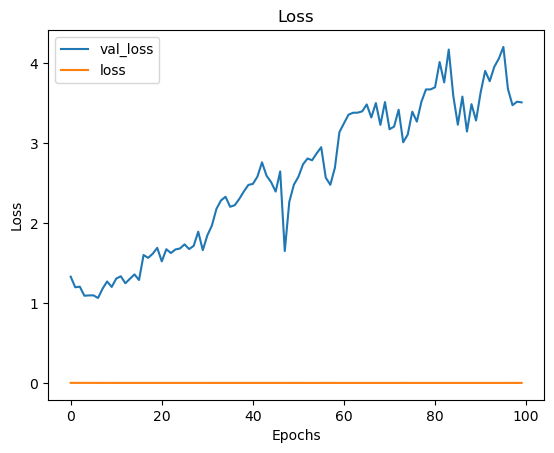

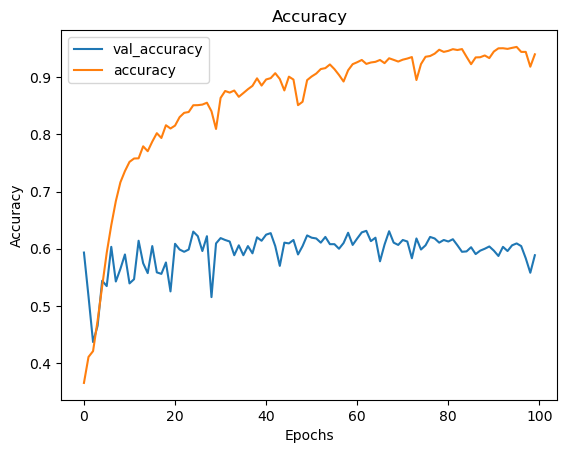

In [53]:
visualize_training_results(second_multi_model_val)

#### Observation

- As we can see the accuracy of the model has decreased from 60.79% to 60.53%, small but it is a clear decline. On the bright side the loss of the model has also decreased meaning that the model is about 4 units off in its predictions than in the first multi-class model, the model was about 5 units far off.
-  The accuracy of the training data has also decreased showing the model has also dealt with overfitting quite abit as training accuracy has decreased from 99% to 95%.

It seems this multi-class classifier will not light up! 

Let us consider increasing the training data and see what changes!

Let us also use L2 regularization;L2 regularization can help prevent the model from overly relying on specific features or classes, leading to a more balanced and robust classifier.

#### Second Tuned LSTM Network

In [54]:
# Calling the vectorization function on the split data
train_padded_sequences_2, test_padded_sequences_2, val_padded_sequences_2 = preprocess_text_data(X_train_last, X_test_1, X_val_1,num_words=5000)

num_classes = 4 # because target variable y has four classes
input_shape = (22, 1)  # Assuming input sequences of length 100 with 1 feature

# Create the LSTM model
model_4 = models.Sequential()
embedding_size = 128
model_4.add(Embedding(5000, embedding_size))
model_4.add(layers.LSTM(56, input_shape=input_shape))
model_4.add(Dropout(0.5))
model_4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dropout(0.5))
model_4.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_4.add(layers.Dense(num_classes, activation='softmax'))# The outpt layer needs to have units similar to number of classes present

# Compile the model
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#sparse_categorical_crossentropy is the loss function used because the labels we have are converted to integers

# Print a summary of the model architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         640000    
                                                                 
 lstm_3 (LSTM)               (None, 56)                41440     
                                                                 
 dropout_3 (Dropout)         (None, 56)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                3648      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 4)                

In [55]:
# Fitting the model on training data
third_multi_model_val = model_4.fit(train_padded_sequences_1,y_train_last,validation_data=
          (val_padded_sequences_1,y_val_1),epochs=90,batch_size=32,sample_weight=sample_weights)

Epoch 1/90


191/191 [==============================] - 7s 23ms/step - loss: 0.4125 - accuracy: 0.2212 - val_loss: 1.4418 - val_accuracy: 0.0660
Epoch 2/90
191/191 [==============================] - 4s 21ms/step - loss: 0.0145 - accuracy: 0.0617 - val_loss: 1.3887 - val_accuracy: 0.0660
Epoch 3/90
191/191 [==============================] - 4s 20ms/step - loss: 0.0011 - accuracy: 0.0834 - val_loss: 1.3853 - val_accuracy: 0.3207
Epoch 4/90
191/191 [==============================] - 4s 20ms/step - loss: 9.1085e-04 - accuracy: 0.1727 - val_loss: 1.3880 - val_accuracy: 0.0660
Epoch 5/90
191/191 [==============================] - 4s 19ms/step - loss: 9.1026e-04 - accuracy: 0.0799 - val_loss: 1.3854 - val_accuracy: 0.3207
Epoch 6/90
191/191 [==============================] - 4s 21ms/step - loss: 9.1035e-04 - accuracy: 0.0858 - val_loss: 1.3848 - val_accuracy: 0.3207
Epoch 7/90
191/191 [==============================] - 4s 19ms/step - loss: 9.1034e-04 - accuracy: 0.3865 - val_loss: 1.3855 - val_accuracy: 0

In [56]:
# Let us evaluate the model on the training data
loss, accuracy = model_4.evaluate(train_padded_sequences_1,y_train_last)
print (f'Training loss and Training accuracy {loss,accuracy}')
#Lets evaluate the model on test data
loss, accuracy = model_4.evaluate(test_padded_sequences_1,y_test_1)
print (f'Test loss and Test accuracy {loss,accuracy}')

  8/191 [>.............................] - ETA: 1s - loss: 1.3884 - accuracy: 0.0234

191/191 [==============================] - 1s 6ms/step - loss: 1.3885 - accuracy: 0.0164
Training loss and Training accuracy (1.3885104656219482, 0.01641227677464485)
47/47 [==============================] - 0s 6ms/step - loss: 1.3885 - accuracy: 0.0187
Test loss and Test accuracy (1.3884905576705933, 0.018666666001081467)


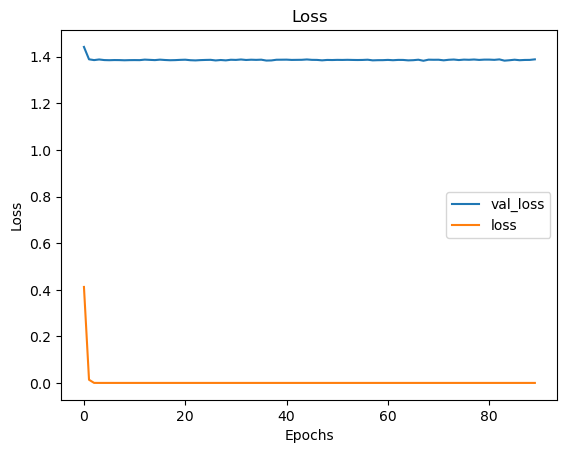

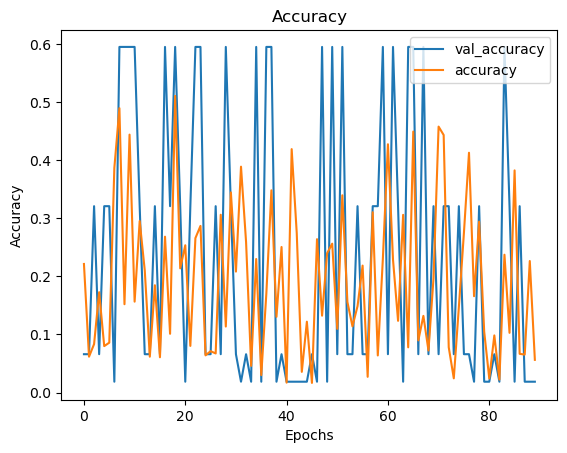

In [60]:
# Visualizing training accuracy and loss of the model
visualize_training_results(third_multi_model_val)

#### Observation

- Woooowww! Increasing number of tokens has had quite the effect on the model we are using, on the plus side the loss in the model has decreased from around 4 units to around 1.83 units, meaning the model is now about 1.83 units off in its predictions of sentiments on tweets.

- Despite this  the model has also recorded a whooping 32% in its accuracy in the model making sentiment predictions which was a big drop from 60% accuracy. With these experimentations in tuning our LSTM Network at the backburner, I proceeded to train other models. 

There is need to experiment to find the best model to rate the sentiment of a tweet based on its content.

#### Training Other Models
I dived into other machine learning algorithms and vectorization strategies, to find the best model for the task at hand!

In [58]:
#Vectorizing the dataset using TF-IDF Vectorizer that allows us to identify the count of rare occurences word acrros a corpus of documents.
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
# fitting the vectorizer on training data
vectoriser.fit(X_train_last)

# transforming test data
vectoriser.transform(X_test_1)
# In the case of models that are not Neural networks it not very necessary to have a validation test and recommended to only use test and training tests
print(f'Vectoriser fitted.')

#  creating pipeline objects that make use of the TF-IDF vectorizer that you built above.
rf =  Pipeline([('Tf-Idf Vectorizer', vectoriser),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Tfidf Vectorizer', vectoriser),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Tfidf Vectorizer', vectoriser),
              ('Logistic Regression', LogisticRegression())])

# Fit the RandomForestClassifier pipeline on the training data
rf.fit(X_train_last, y_train_last)

# Predicting the labels for the testing data

predictions = rf.predict(X_test_1)
scores = accuracy_score(y_test_1,predictions)
print(f'RandomForestClassifier : {scores}')


# Fit the SVC pipeline on the training data
svc.fit(X_train_last, y_train_last)

# Predict the labels for the testing data

prediction = svc.predict(X_test_1)
score = accuracy_score(y_test_1,prediction)
print(f'Support Vector Machine: {score}')


# Fit the Logistic Regression pipeline on the training data
lr.fit(X_train_last, y_train_last)

# Predict the labels for the testing data

predictionss = lr.predict(X_test_1)
scoress = accuracy_score(y_test_1,predictionss)
print(f'LogisticRegression: {scoress}')


Vectoriser fitted.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   37.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier : 0.6506666666666666
Support Vector Machine: 0.6626666666666666
LogisticRegression: 0.676


c:\Users\HP\anaconda3_2.0\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Displaying the accuracy score for each of the models
print(f'LogisticRegression: {scoress}')
print(f'Support Vector Machine: {score}')
print(f'RandomForestClassifier : {scores}')

LogisticRegression: 0.676
Support Vector Machine: 0.6626666666666666
RandomForestClassifier : 0.6506666666666666


#### Observation

- As we can see among all the machine learning models run in the entirety of the notebook, `Logistic Regression model` had the best accuracy score for our Multi-class Classifier. It is therefore the best model that will rate a sentiment based on the tweets we have in our dataset. The model had an `accuracy score` of `0.676`, `highest accuracy obtained.`

#### Important to Note:

In the cells above we have made a complete turn over of the machine learning models to use for this specific NLP task and in this case after dealing with RNN model, I decided to experiment with Logistic Regression,RandomForestClassifier ans Support Vector machines.

Why these algorithms; these algorithms have been widely used in NLP for their effectiveness and ability to handle high-dimensional text data. It does not dismiss other algorithms but these were my choice of algorithms among many for this reason.

I used Tf-Idf vectorizer as it is based on the idea that rare words in text have much more information about the content of a document more than the words that have appeared many times across the corpus of documents.



#### 8. Conclusions
1. The dataset had tweets with different sentiments expressed with the highest sentiment expressed to be Negative emotion as shown below:

    i) Percentage of Negative emotion: 59.27%

    ii) Percentage of Positive emotion: 32.75%

    iii) Percentage of No emotion toward brand or product: 6.27%

    iv) Percentage of I can't tell: 1.72%

- This was a bad review in itself as it meant they had higher negative reviews than positive reviews about their products.


2. The analysis of sentiments directed towards the company's products varied from one product to the other, despite negative tweets having the highest percentage in the dataset products combined, on visualizing the products separately I was able to discover that each product had higher positive sentiments than negative, neutral and unknown sentiments directed towards them starting with:

    i)  iPad had the highest number of positive tweets, but it also had the highest number of negative tweets.

    ii) iPhone had the second highest number of negative tweets about it.

    iii) Apple products had the second highest number of positive tweets about it but also had the third highest negative tweets about it.


    iv) Android, Android apps, and other Apple products or Services had the lowest positive tweets about them.

    v) Google products had the fourth lowest negative tweets about it.

3. By visualizing the products and emotions directed towards them, I concluded that to achieve much more success, the focus should be positive and negative sentiments which gave much more valuable insight than neutral sentiments(No emotion toward brand or product) and unknown sentiments (I can't tell).



#### 9. Recommendations

1. Despite the model with the highest accuracy being the Logistic Regression model with an `accuracy score` of `0.676`, I would recommend the LSTM Network part of the RNN(Recurrent Neural Network Architecture) architecture to the company as the model to use to rate the sentiments in the tweets about their products as it is able to capture as much information as possible effectively without having difficulty learning long-term dependencies. 

2. I would recommend the company to specifically focus on improving all their products and to be particular:

    i) Focus on marketing Android, Android app, and other Apple products or Services much more as they had the least number of tweets about them, meaning customers really do not have much of an opinion towards them which would mean they are not using them.

    ii) Despite the iPad being the product with the highest tweets it also had the highest negative tweets, the company should direct resources on finding out why it had the highest negative tweets.
    
    iii) Apple and iPhone had the third and second highest negative tweets respectively, the company should also find out why is that.

3. The products from these companies all had higher positive tweets about them than negative tweets, this was a great achievement and it should also direct resources into reducing the negative tweets about them starting with looking into iPad products and why they had the highest positive and taking into consideration what got it the highest positive tweets
